<a href="https://colab.research.google.com/github/manvendra7/datascience/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
dataset = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [23]:
dataset.shape

(150, 5)

In [24]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [0]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = dataset[feature_columns].values
y = dataset['species'].values

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
!pip install Anaconda

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

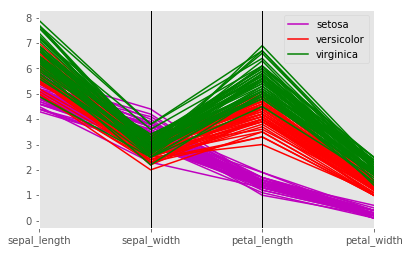

In [32]:
from pandas.plotting import parallel_coordinates
from matplotlib import style
style.use('ggplot')

parallel_coordinates(
dataset,'species',
    color=('m','r','g'))
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [36]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [0]:
k_list = list(range(1,50,2))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

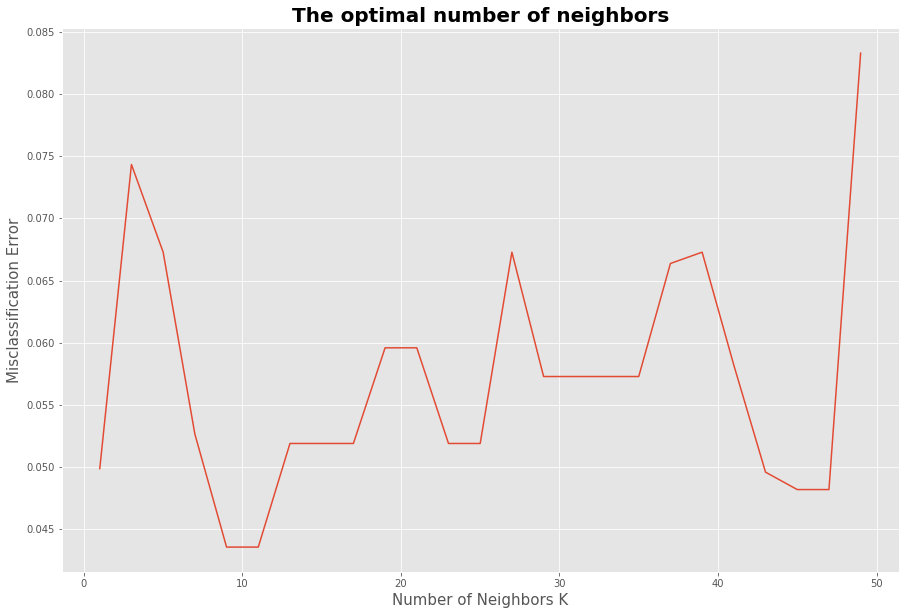

In [39]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [40]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
